# Define Random Variables

Определим две дискретные СВ в виде словаря:

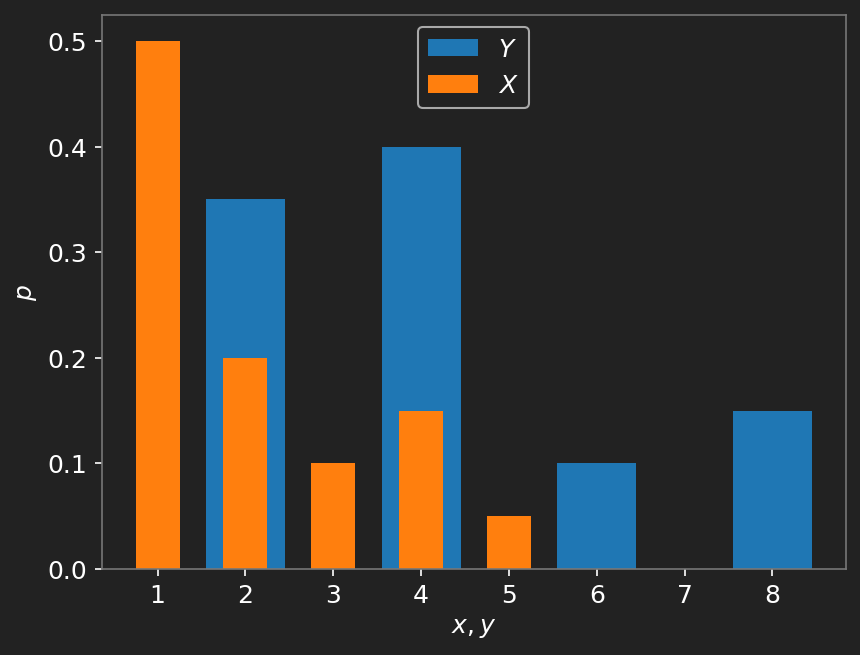

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")

X = {   "xs": np.array([1., 2., 3., 4.,  5.]),
        "ps": np.array([.5, .2, .1, .15, .05]) }

Y = {   "xs": np.array([2.,  4.,  6., 8.]),
        "ps": np.array([.35, .4, .1, .15]) }

plt.bar(Y["xs"], Y["ps"], width=0.9, label="$Y$")
plt.bar(X["xs"], X["ps"], width=0.5, label="$X$")
plt.legend(loc="upper center")
plt.xlabel("$x, y$")
plt.ylabel("$p$")
plt.show()

In [5]:
def E(A):   return np.sum(A["xs"] * A["ps"])
def Var(A): return np.sum(((A["xs"] - E(A))**2) * A["ps"])
def std(A): return np.sqrt(Var(A))

print(f"{E(X) = :.2f}, {Var(X) = :.2f}, {std(X) = :.2f}")
print(f"{E(Y) = :.2f}, {Var(Y) = :.2f}, {std(Y) = :.2f}")

E(X) = 2.05, Var(X) = 1.65, std(X) = 1.28
E(Y) = 4.10, Var(Y) = 4.19, std(Y) = 2.05


# Произведение случайных величин

Функция `mulRV()` принимает два словаря, содержащие распределения, и возвращает их произведение. Отличается от функции `addRV()` лишь одной строчкой, которая обозначена в коде:

In [6]:
def mulRV(dist_1, dist_2):
    
    new_xs, new_ps = [], []
    for x1, p1 in zip(dist_1["xs"], dist_1["ps"]):
        for x2, p2 in zip(dist_2["xs"], dist_2["ps"]):
            new_xs.append(x1*x2)  # <-- multiplication instead addition 
            new_ps.append(p1*p2)

    ordered = sorted(list(zip(new_xs, new_ps)), key=lambda x: x[0])
    
    new_xs, new_ps = [], []
    for x, p in ordered:
        if x in new_xs:
            new_ps[-1] += p
        else:
            new_xs.append(x)
            new_ps.append(p)
    
    return {"xs": np.array(new_xs), "ps": np.array(new_ps)}

In [7]:
print(X)
print(Y)

{'xs': array([1., 2., 3., 4., 5.]), 'ps': array([0.5 , 0.2 , 0.1 , 0.15, 0.05])}
{'xs': array([2., 4., 6., 8.]), 'ps': array([0.35, 0.4 , 0.1 , 0.15])}


In [8]:
prodRV = mulRV(X, Y)
print(prodRV["xs"], sum(prodRV["ps"]))

[ 2.  4.  6.  8. 10. 12. 16. 18. 20. 24. 30. 32. 40.] 1.0


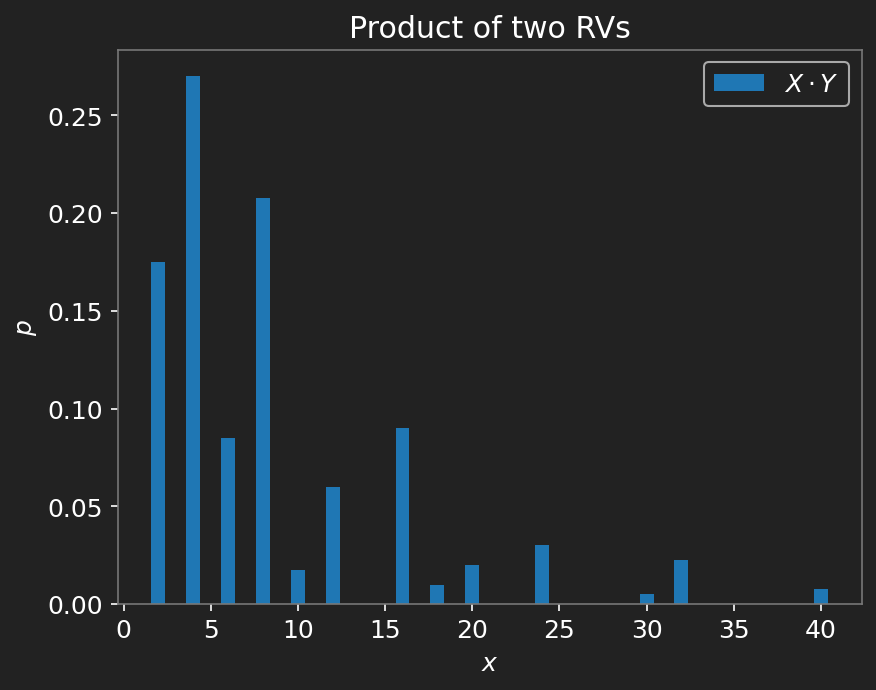

In [9]:
plt.bar(prodRV["xs"], prodRV["ps"], label="$X \\cdot Y$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$p$")
plt.title("Product of two RVs")
plt.show()